In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
%cd /content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Data_modelo

/content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Data_modelo


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [96]:
import os
print(os.getcwd())

/content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Data_modelo


In [97]:
# Load the datasets
import pandas as pd

# Load the datasets
# Load the datasets
df_balanceado = pd.read_csv('df_modelo.csv', sep=',')
#df_balanceado = df_balanceado.sample(10000)

In [98]:
df_filtrado = df_balanceado [['pct_empregado_com_carteira',
                                'qtde_pessoas',
                                'pct_militar_servidor',
                                'pct_idosos',
                                'pct_deficientes',
                                'pct_escolar_nunca_freq_escola',
                                'classe_renda']]

In [99]:
# Assumindo que a última coluna é o target (ajuste se necessário):
X = df_filtrado.iloc[:, :-1]
y = df_filtrado.iloc[:, -1]

In [100]:
X.describe()

,pct_empregado_com_carteira,qtde_pessoas,pct_militar_servidor,pct_idosos,pct_deficientes,pct_escolar_nunca_freq_escola
count,96502.000000,96502.000000,96502.000000,96502.000000,96502.000000,96502.000000
mean,0.039307,2.642401,0.006829,0.148081,0.071637,0.007940
std,0.140104,1.414091,0.064011,0.331664,0.218495,0.053329
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
X.isnull().sum().sum()

0

In [102]:
y.isnull().sum()

0

In [103]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Fazendo a avaliação usando apenas as features mais importantes

In [104]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [105]:
!pip install xgboost -q

In [106]:
!pip install catboost -q

In [107]:
# Importações necessárias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier # This line was added to import the missing class
from sklearn.linear_model import LogisticRegression # Import LogisticRegression from sklearn.linear_model
# Import necessary metrics
from sklearn.metrics import f1_score, accuracy_score # This line imports f1_score and accuracy_score
import pandas as pd # Assuming you're using pandas for the DataFrame

In [108]:
# Definir os modelos e os parâmetros
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [300, 350],
            'classifier__max_depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [500, 600],
            'classifier__depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    }
}

In [109]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

# Criar uma lista para armazenar os resultados
results = []

# Criar o modelo e fazer GridSearchCV
for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])

    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_

    # Armazenar os melhores hiperparâmetros
    best_params = grid_search.best_params_

    # Avaliar o modelo
    y_pred = grid_search.predict(X_test)  # Usar o grid_search para prever
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)

    # Adicionar os resultados à lista
    results.append({
        'Modelo': model_name,
        'Melhores Hiperparâmetros': best_params,
        'F1 Score': f1,
        'Acurácia': accuracy
    })

# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results)

# Exibir o DataFrame
results_df.head()

,Modelo,Melhores Hiperparâmetros,F1 Score,Acurácia
0,RandomForest,"{'classifier__max_depth': 10, 'classifier__n_e...",0.700344,0.763173
1,XGBoost,"{'classifier__learning_rate': 0.1, 'classifier...",0.698939,0.762448
2,CatBoost,"{'classifier__depth': 2, 'classifier__iteratio...",0.698946,0.762499


In [118]:
best_params

{'classifier__depth': 2,
 'classifier__iterations': 600,
 'classifier__learning_rate': 0.1}

Modelo: RandomForest
  Melhor FNR para a classe 0: 0.00 com limiar 0.00
  Melhor FNR para a classe 1: 0.00 com limiar 0.00
  Melhor FNR para a classe 2: 0.00 com limiar 0.01


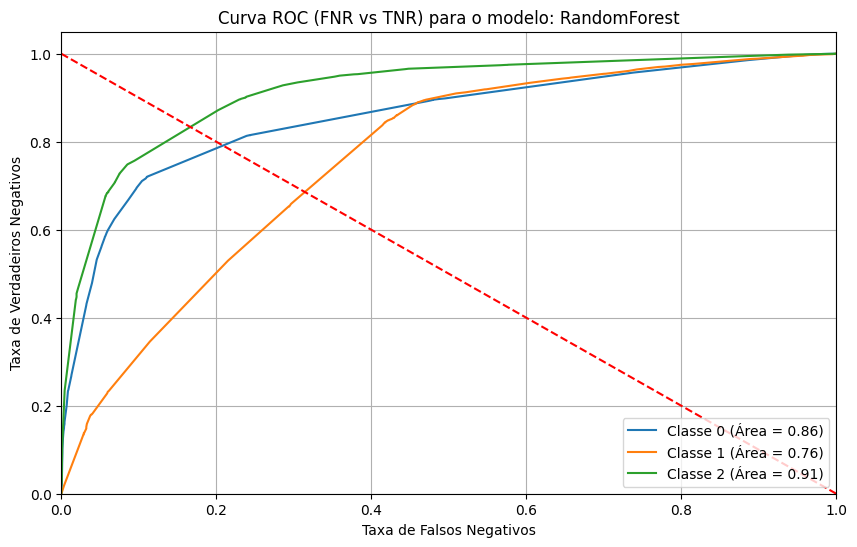

Modelo: XGBoost
  Melhor FNR para a classe 0: 0.00 com limiar 0.01
  Melhor FNR para a classe 1: 0.00 com limiar 0.02
  Melhor FNR para a classe 2: 0.00 com limiar 0.00


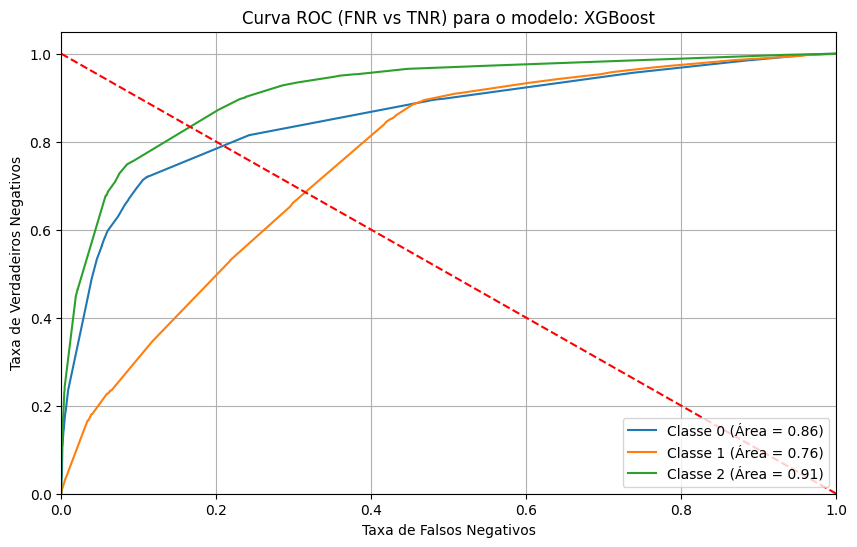

Modelo: CatBoost
  Melhor FNR para a classe 0: 0.00 com limiar 0.01
  Melhor FNR para a classe 1: 0.00 com limiar 0.02
  Melhor FNR para a classe 2: 0.00 com limiar 0.00


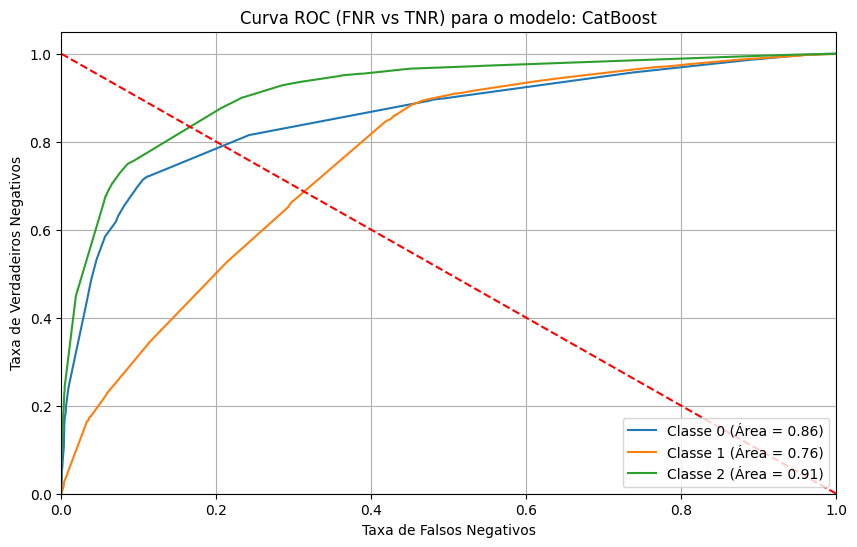

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Avaliar todos os modelos e plotar a curva ROC para FNR e TNR
for model_name, model in best_models.items():
    # Prevendo as probabilidades para cada classe
    y_scores = model.predict_proba(X_test)  # Prevendo as probabilidades para todas as classes

    # Criar uma figura para cada modelo
    plt.figure(figsize=(10, 6))

    # Variáveis para armazenar as melhores FNR para cada classe e o limiar correspondente
    best_fnr_per_class = {}
    best_threshold_per_class = {}

    for i in range(y_scores.shape[1]):
        # Calcular a curva ROC
        fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i], pos_label=i)

        # Calcular TNR e FNR
        tnr = 1 - fpr  # Taxa de Verdadeiros Negativos (TNR)
        fnr = 1 - tpr  # Taxa de Falsos Negativos (FNR)

        # Calcular a AUC
        roc_auc = auc(fpr, tpr)

        # Encontrar o limiar que minimiza a FNR para a classe atual
        best_fnr_idx = np.argmin(fnr)
        best_fnr = fnr[best_fnr_idx]
        best_threshold = thresholds[best_fnr_idx]

        # Armazenar os melhores valores para a classe atual
        best_fnr_per_class[i] = best_fnr
        best_threshold_per_class[i] = best_threshold

        # Plotando a curva FNR vs. TNR
        plt.plot(fnr, tnr, label='Classe {} (Área = {:.2f})'.format(i, roc_auc))

    # Exibir os melhores valores de FNR para cada classe
    print(f"Modelo: {model_name}")
    for cls, fnr_value in best_fnr_per_class.items():
        print(f"  Melhor FNR para a classe {cls}: {fnr_value:.2f} com limiar {best_threshold_per_class[cls]:.2f}")

    # Linha de referência
    plt.plot([0, 1], [1, 0], color='red', linestyle='--')  # Linha de referência para FNR e TNR

    # Configurações do gráfico
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Negativos')
    plt.ylabel('Taxa de Verdadeiros Negativos')
    plt.title(f'Curva ROC (FNR vs TNR) para o modelo: {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

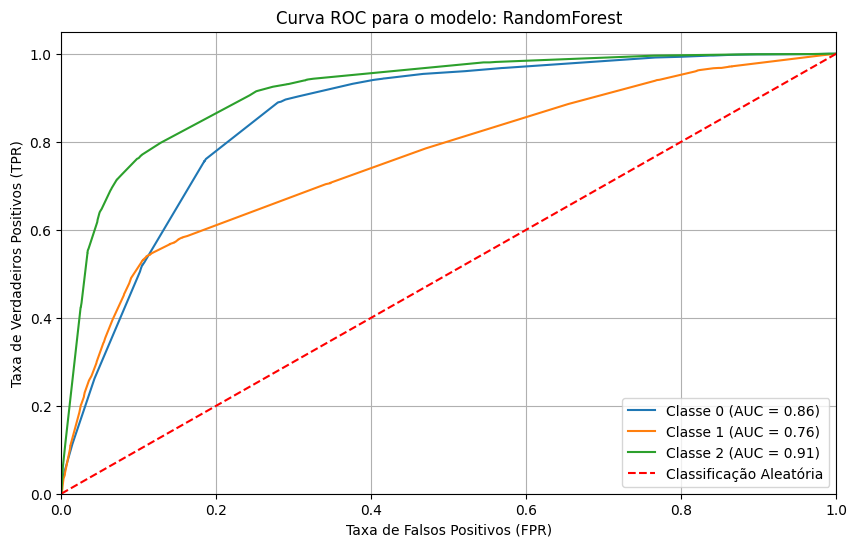

Modelo: RandomForest
  Melhor FPR para a classe 0: 0.00 com limiar inf
Modelo: RandomForest
  Melhor FPR para a classe 1: 0.00 com limiar inf
Modelo: RandomForest
  Melhor FPR para a classe 2: 0.00 com limiar inf


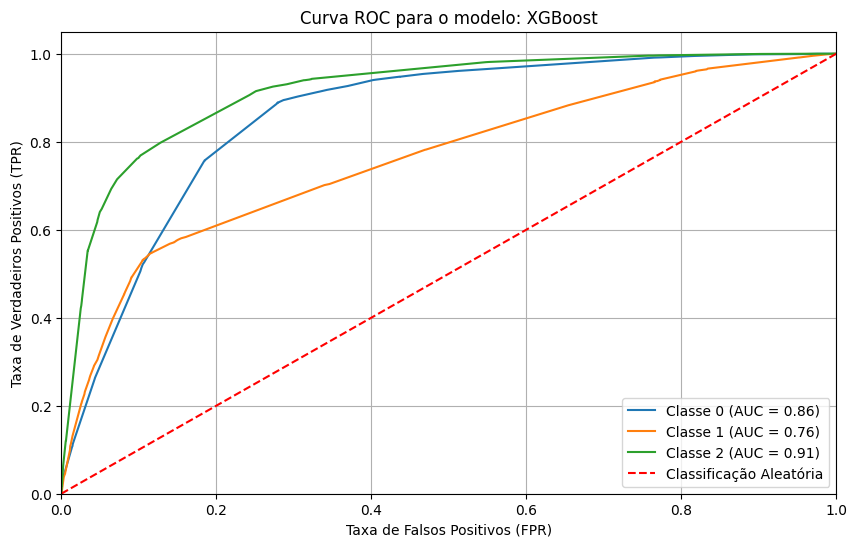

Modelo: XGBoost
  Melhor FPR para a classe 0: 0.00 com limiar inf
Modelo: XGBoost
  Melhor FPR para a classe 1: 0.00 com limiar inf
Modelo: XGBoost
  Melhor FPR para a classe 2: 0.00 com limiar inf


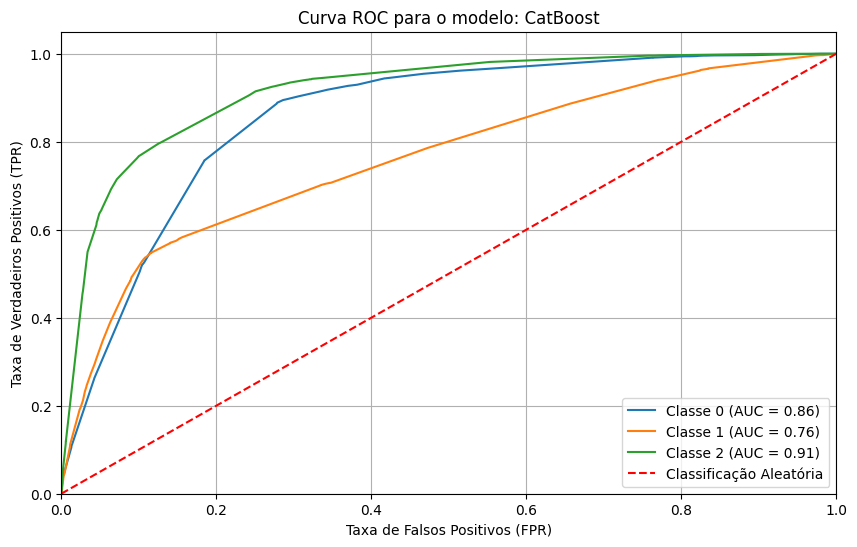

Modelo: CatBoost
  Melhor FPR para a classe 0: 0.00 com limiar inf
Modelo: CatBoost
  Melhor FPR para a classe 1: 0.00 com limiar inf
Modelo: CatBoost
  Melhor FPR para a classe 2: 0.00 com limiar inf


In [111]:
# Ajustando os limiares de decisão dos modelos para observar como os valores de FPR (Taxa de Falsos Positivos) e TPR (Taxa de Verdadeiros Positivos) mudam,
# e incluir métricas adicionais como o F1-score e balanced accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Avaliar todos os modelos e plotar a curva ROC usando FPR
for model_name, model in best_models.items():
    # Prevendo as probabilidades para cada classe
    y_scores = model.predict_proba(X_test)  # Prevendo as probabilidades para todas as classes

    # Plotar a curva ROC para cada classe
    plt.figure(figsize=(10, 6))

    for i in range(y_scores.shape[1]):
        # Calcular a curva ROC para cada classe
        fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i], pos_label=i)

        # Calcular a AUC
        roc_auc = auc(fpr, tpr)

        # Plotando a curva FPR vs. TPR (Curva ROC tradicional)
        plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {roc_auc:.2f})')

    # Linha de referência
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Classificação Aleatória')  # Linha de referência para ROC

    # Configurações do gráfico
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title(f'Curva ROC para o modelo: {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Identificar o melhor limiar que minimiza os falsos positivos para cada classe
    for i in range(y_scores.shape[1]):
        fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i], pos_label=i)
        # Encontra o índice do menor FPR
        best_threshold_index = np.argmin(fpr)
        best_fpr = fpr[best_threshold_index]
        best_threshold = thresholds[best_threshold_index]
        print(f"Modelo: {model_name}")
        print(f"  Melhor FPR para a classe {i}: {best_fpr:.2f} com limiar {best_threshold:.2f}")


In [117]:
y_probs


NameError: name 'y_probs' is not defined

Ajustando thresholds para o modelo: RandomForest


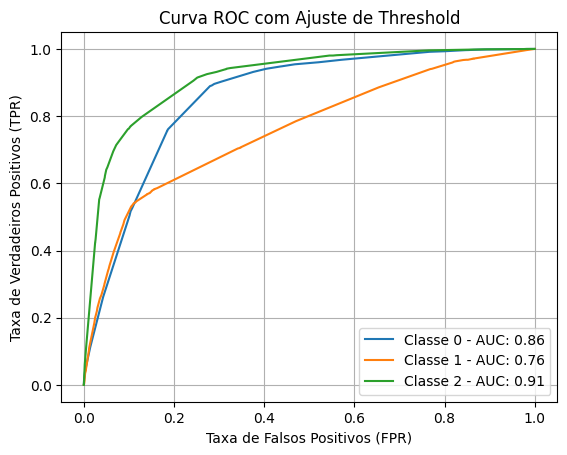

Melhores thresholds para RandomForest: {0: {'threshold': 0.6000000000000001, 'F1_score': 0.1112168044163046, 'balanced_accuracy': 0.8047360601327282}, 1: {'threshold': 0.30000000000000004, 'F1_score': 0.44545314663030194, 'balanced_accuracy': 0.7147961043537432}, 2: {'threshold': 0.30000000000000004, 'F1_score': 0.345014678406027, 'balanced_accuracy': 0.8316907541582499}}
Relatório de classificação para RandomForest com ajuste de threshold:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85     11275
         1.0       0.60      0.49      0.54      4120
         2.0       0.74      0.68      0.71      3906

    accuracy                           0.76     19301
   macro avg       0.72      0.69      0.70     19301
weighted avg       0.75      0.76      0.76     19301

Ajustando thresholds para o modelo: XGBoost


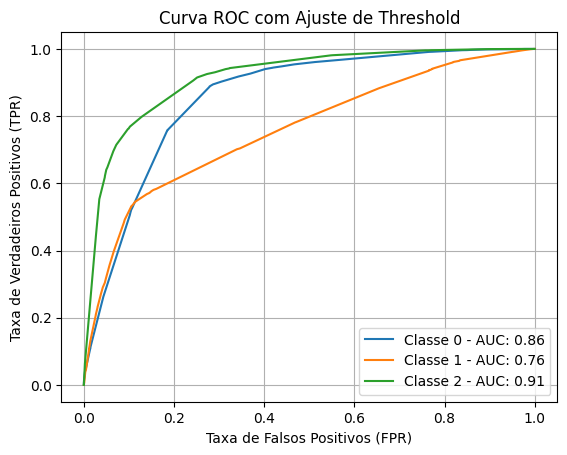

Melhores thresholds para XGBoost: {0: {'threshold': 0.6000000000000001, 'F1_score': 0.11132695175977501, 'balanced_accuracy': 0.8046568773437548}, 1: {'threshold': 0.30000000000000004, 'F1_score': 0.44571090825570764, 'balanced_accuracy': 0.7153509784522426}, 2: {'threshold': 0.2, 'F1_score': 0.35083299663109396, 'balanced_accuracy': 0.8333435440550234}}
Relatório de classificação para XGBoost com ajuste de threshold:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85     11275
         1.0       0.59      0.49      0.53      4120
         2.0       0.73      0.69      0.71      3906

    accuracy                           0.76     19301
   macro avg       0.72      0.69      0.70     19301
weighted avg       0.75      0.76      0.76     19301

Ajustando thresholds para o modelo: CatBoost


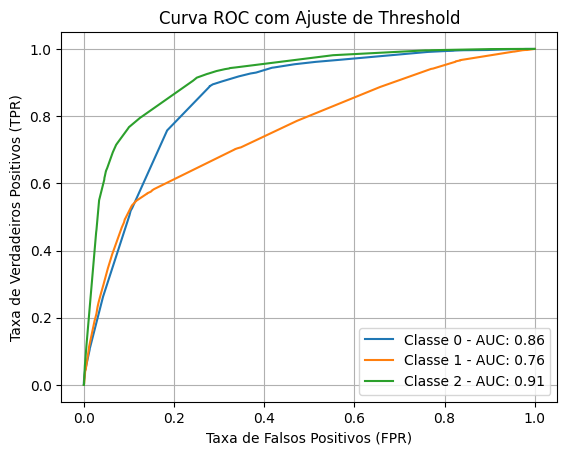

Melhores thresholds para CatBoost: {0: {'threshold': 0.6000000000000001, 'F1_score': 0.11117275955202417, 'balanced_accuracy': 0.8048701642057989}, 1: {'threshold': 0.30000000000000004, 'F1_score': 0.44621131885788223, 'balanced_accuracy': 0.7154759030673881}, 2: {'threshold': 0.2, 'F1_score': 0.34833420022264067, 'balanced_accuracy': 0.8336472714507057}}
Relatório de classificação para CatBoost com ajuste de threshold:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85     11275
         1.0       0.59      0.49      0.53      4120
         2.0       0.73      0.69      0.71      3906

    accuracy                           0.76     19301
   macro avg       0.72      0.69      0.70     19301
weighted avg       0.75      0.76      0.76     19301



,Modelo,Melhores Hiperparâmetros,F1 Score,Acurácia,Classe,Melhor Threshold,Balanced Accuracy
0,RandomForest,"{'classifier__max_depth': 10, 'classifier__n_e...",0.700344,0.763173,NaN,NaN,NaN
1,XGBoost,"{'classifier__learning_rate': 0.1, 'classifier...",0.698939,0.762448,NaN,NaN,NaN
2,CatBoost,"{'classifier__depth': 2, 'classifier__iteratio...",0.698946,0.762499,NaN,NaN,NaN
3,RandomForest,NaN,0.111217,NaN,0.0,0.6,0.804736
4,RandomForest,NaN,0.445453,NaN,1.0,0.3,0.714796


In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, balanced_accuracy_score
from sklearn.metrics import classification_report

# Função para ajustar o limiar e calcular métricas
def adjust_thresholds(model, X_test, y_test, thresholds=np.arange(0.0, 1.1, 0.1)):
    y_probs = model.predict_proba(X_test)
    best_thresholds = {}

    for i in range(y_probs.shape[1]):  # Para cada classe
        f1_scores = []
        balanced_accuracies = []

        # Calcular a curva ROC para a classe
        fpr, tpr, _ = roc_curve(y_test == i, y_probs[:, i])
        plt.plot(fpr, tpr, label=f'Classe {i} - AUC: {auc(fpr, tpr):.2f}')

        for threshold in thresholds:
            # Ajustar o limiar para a classe 'i'
            y_pred_threshold = (y_probs[:, i] >= threshold).astype(int)

            # Calcular métricas para a classe
            f1 = precision_recall_fscore_support(y_test, y_pred_threshold, average='macro', zero_division=0)[2]
            balanced_acc = balanced_accuracy_score(y_test == i, y_pred_threshold)

            f1_scores.append(f1)
            balanced_accuracies.append(balanced_acc)

        # Identificar o melhor threshold com base na métrica que deseja otimizar
        best_idx = np.argmax(balanced_accuracies)  # Exemplo: escolher o que maximiza a balanced accuracy
        best_thresholds[i] = {
            'threshold': thresholds[best_idx],
            'F1_score': f1_scores[best_idx],
            'balanced_accuracy': balanced_accuracies[best_idx]
        }

    # Plotar a curva ROC para todas as classes
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC com Ajuste de Threshold')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return best_thresholds

# Lista para armazenar os resultados de thresholds
thresholds_results = []

# Exemplo de uso para ajustar thresholds em um dos melhores modelos
for model_name, model in best_models.items():
    print(f"Ajustando thresholds para o modelo: {model_name}")
    best_thresholds = adjust_thresholds(model, X_test, y_test)
    print(f"Melhores thresholds para {model_name}: {best_thresholds}")

    # Previsões ajustadas usando o melhor threshold encontrado
    y_pred_adjusted = np.argmax(model.predict_proba(X_test), axis=1)

    # Geração do relatório de classificação com o parâmetro zero_division=0
    report = classification_report(y_test, y_pred_adjusted, zero_division=0)
    print(f"Relatório de classificação para {model_name} com ajuste de threshold:")
    print(report)

    # Armazenar os resultados em thresholds_results
    for class_index, metrics in best_thresholds.items():
        thresholds_results.append({
            'Modelo': model_name,
            'Classe': class_index,
            'Melhor Threshold': metrics['threshold'],
            'F1 Score': metrics['F1_score'],
            'Balanced Accuracy': metrics['balanced_accuracy']
        })

# Criar um DataFrame com os resultados de thresholds
thresholds_results_df = pd.DataFrame(thresholds_results)

# Concatenar com o results_df
final_results_df = pd.concat([results_df, thresholds_results_df], ignore_index=True)

# Exibir o DataFrame final
final_results_df.head()



In [113]:
# Exibir o DataFrame final
final_results_df.head(20)

,Modelo,Melhores Hiperparâmetros,F1 Score,Acurácia,Classe,Melhor Threshold,Balanced Accuracy
0,RandomForest,"{'classifier__max_depth': 10, 'classifier__n_e...",0.700344,0.763173,NaN,NaN,NaN
1,XGBoost,"{'classifier__learning_rate': 0.1, 'classifier...",0.698939,0.762448,NaN,NaN,NaN
2,CatBoost,"{'classifier__depth': 2, 'classifier__iteratio...",0.698946,0.762499,NaN,NaN,NaN
3,RandomForest,NaN,0.111217,NaN,0.0,0.6,0.804736
4,RandomForest,NaN,0.445453,NaN,1.0,0.3,0.714796
5,RandomForest,NaN,0.345015,NaN,2.0,0.3,0.831691
6,XGBoost,NaN,0.111327,NaN,0.0,0.6,0.804657
7,XGBoost,NaN,0.445711,NaN,1.0,0.3,0.715351
8,XGBoost,NaN,0.350833,NaN,2.0,0.2,0.833344
9,CatBoost,NaN,0.111173,NaN,0.0,0.6,0.804870


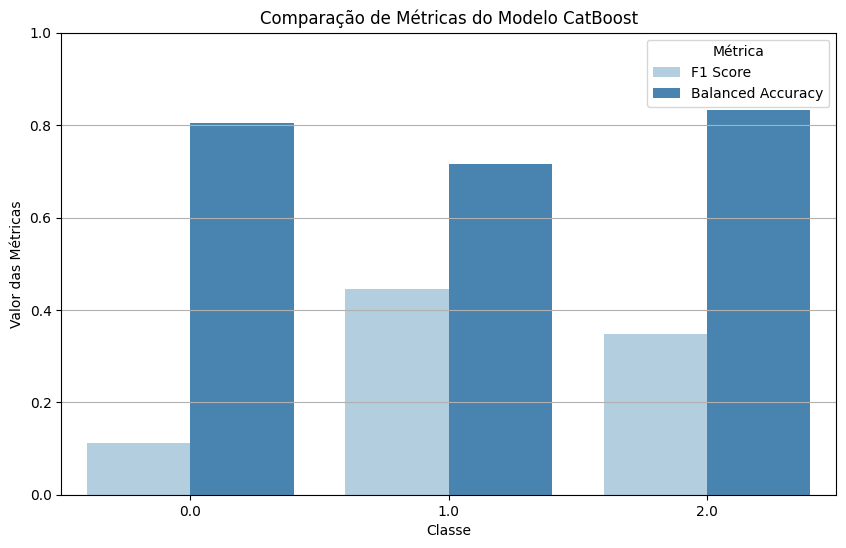

Melhores Thresholds para o CatBoost:
        Melhor Threshold
Classe                  
NaN                  NaN
0.0                  0.6
1.0                  0.3
2.0                  0.2


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Acessando o final_results_df
final_results_df = pd.DataFrame(final_results_df)

# Filtrando apenas os resultados do CatBoost e as métricas relevantes
catboost_results = final_results_df[final_results_df['Modelo'] == 'CatBoost']

# Reshape do DataFrame para long format para visualização
catboost_melted = catboost_results.melt(id_vars=['Modelo', 'Classe'],
                                          value_vars=['F1 Score', 'Balanced Accuracy'],
                                          var_name='Métrica',
                                          value_name='Valor')

# Criar o gráfico de barras para CatBoost
plt.figure(figsize=(10, 6))
sns.barplot(data=catboost_melted, x='Classe', y='Valor', hue='Métrica', palette='Blues')
plt.title('Comparação de Métricas do Modelo CatBoost')
plt.xlabel('Classe')
plt.ylabel('Valor das Métricas')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(title='Métrica')
plt.show()

# Para visualizar os melhores thresholds para cada classe do CatBoost
best_thresholds = catboost_results[['Classe', 'Melhor Threshold']].set_index('Classe')

print("Melhores Thresholds para o CatBoost:")
print(best_thresholds)

